# DSC Final Project

In [ ]:
hi

## Problem Statement and Questions for Analysis

## Problem Statement:**

Analyzing the dynamics and patterns of player transfers in the Premier League during the 2021 season, focusing on aspects such as market value, player demographics, and transfer activities, to uncover insights into the transfer strategies of clubs and the overall trends in the league.

## Questions for Analysis:**

Is there a correlation between a player's market value and their age or nationality?

Do certain positions command higher transfer fees on average?

How does the market value of players vary between different clubs?

Is there a trend in the movement (in/out) of players in relation to their nationalities or the league they are coming from or going to?


In [14]:
#Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [15]:
#Data import
prem = 'premier-league.csv'
premdata = pd.read_csv(prem)

# Data Cleaning and Preperation

In [16]:
# Ensure consistency in data types for each column
premdata['age'] = premdata['age'].astype(int)
premdata['market_value'] = pd.to_numeric(premdata['market_value'], errors='coerce')
premdata['fee'] = pd.to_numeric(premdata['fee'], errors='coerce')

# Handle missing or inconsistent data entries
officialdata = premdata.dropna(subset=['market_value', 'fee'])

# Summaries of Categorical and Numerical Features

# Numerical Summaries
numerical_summary = officialdata[['age', 'market_value', 'fee']].describe()
print(numerical_summary)

# Categorical Data Summary
categorical_summary = officialdata[['club', 'nationality', 'position', 'movement', 'window', 'league', 'is_loan']].describe()
print(categorical_summary)

              age  market_value           fee
count  302.000000  3.020000e+02  3.020000e+02
mean    25.172185  1.022459e+07  6.413510e+06
std      4.375652  1.447772e+07  1.563861e+07
min     18.000000  2.500000e+04  0.000000e+00
25%     22.000000  1.500000e+06  0.000000e+00
50%     24.000000  5.000000e+06  0.000000e+00
75%     28.750000  1.500000e+07  5.887500e+06
max     37.000000  1.000000e+08  1.175000e+08
                  club nationality     position movement  window  \
count              302         302          302      302     302   
unique              19          58           13        2       1   
top     Southampton FC     England  Centre-Back      out  summer   
freq                33          91           52      204     302   

                league is_loan  
count              302     302  
unique               1       2  
top     Premier League   False  
freq               302     176  


# Age vs Market Value

## Purpose:

 This plot is designed to visually explore the relationship between a player's age and their market value.

## Expected Trends:

A possible trend where younger players have higher market values, reflecting the premium placed on youth and potential in sports.

A concentration of data points in specific age ranges, indicating the most common ages for high-value transfers.

Any outliers, such as significantly older players with high market values or young players with unexpectedly low market values, would be of particular interest.


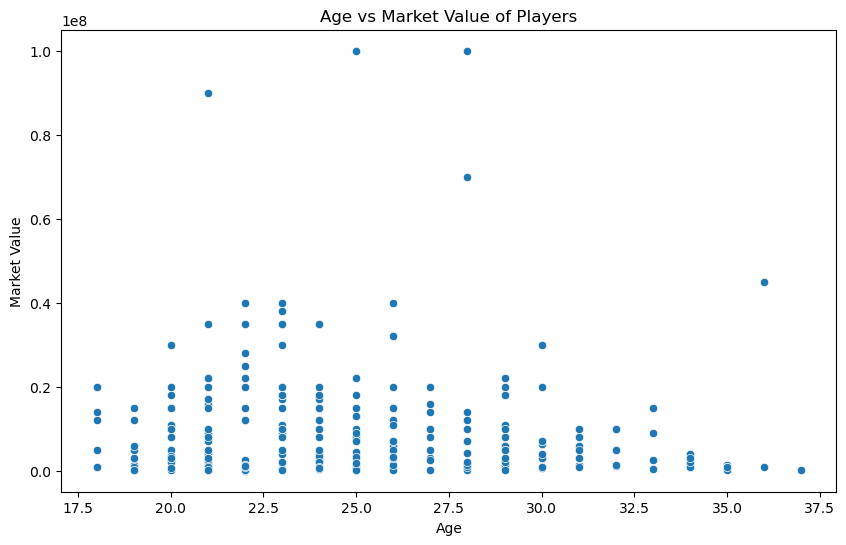

In [17]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='age', y='market_value', data=officialdata)
plt.title('Age vs Market Value of Players')
plt.xlabel('Age')
plt.ylabel('Market Value')
plt.show()

## Actual Trends Observed in the Scatter Plot:

The bulk of the data points are clustered in the lower market value range, with a few outliers that have significantly higher market values.
There is a wide spread of market values for players in the early to mid-twenties, which is a common age range for players to reach their peak market value.
A few older players (around the age of 30 and beyond) still maintain a high market value, indicating that certain players retain value beyond the typical peak ages.
The density of points decreases as age increases, which may suggest that fewer older players command high market values, but the trend is not strictly linear.
There is no clear downward or upward trend that would suggest a strong correlation between age and market value across the entire dataset.

## Conclusion:

The scatter plot indicates that while age is a factor in a player's market value, it is not the sole determinant. Other factors likely contribute to a player's market value, including position, skill level, reputation, and past performance. The relatively flat distribution across ages suggests that the Premier League values a wide range of player ages, with the market adjusting for factors beyond just the potential for future performance.

# Average Transfee Fee per Position

## Purpose:

This bar chart aims to analyze the average transfer fees associated with players in different positions within the Premier League. It provides insights into the relative market value of players based on their on-field roles.

## Expected Trends:

Higher transfer fees for attacking positions, such as strikers and wingers, due to their direct contribution to scoring goals and thus potentially having a more visible impact on a team's success.
Mid-range fees for midfielders and defenders, reflecting the importance of a balanced team composition.
Lower fees for goalkeepers, possibly due to a combination of factors such as a lower rate of turnover and the specialized nature of the position.


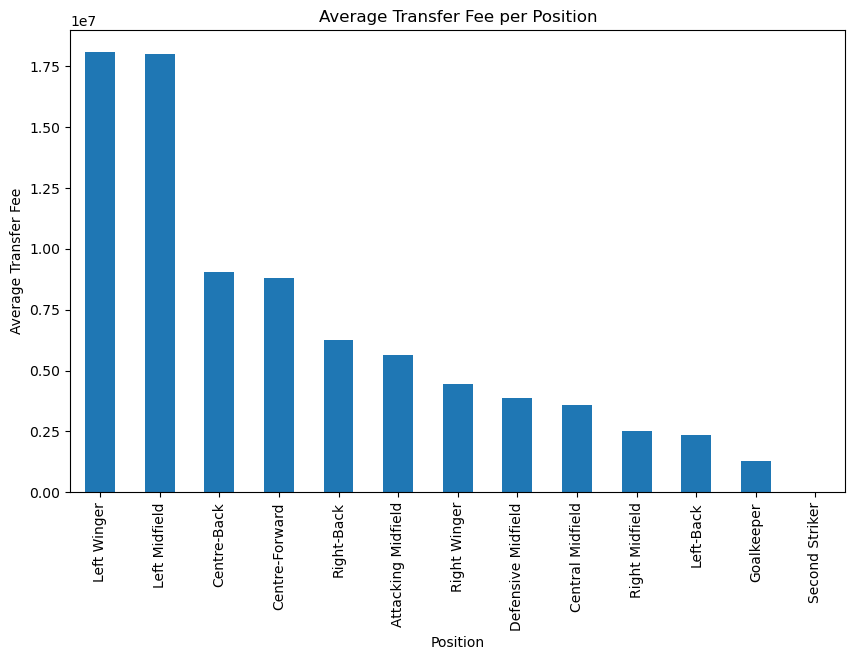

In [18]:
avg_fee_per_position = officialdata.groupby('position')['fee'].mean().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
avg_fee_per_position.plot(kind='bar')
plt.title('Average Transfer Fee per Position')
plt.xlabel('Position')
plt.ylabel('Average Transfer Fee')
plt.show()

## Actual Trends Observed in the Bar Chart:

The left wingers command the highest average transfer fees among all positions, followed closely by left midfielders. This may reflect the high value placed on players who can create scoring opportunities from the flanks.
Centre forwards also command high transfer fees, which is expected given the premium on players who can score goals.
Defensive positions like centre back and right back occupy the mid-range of the transfer fee spectrum.
Interestingly, attacking midfielders, while traditionally valued for their creativity, do not have the highest average fees according to this data.
The average fees for defensive midfielders and central midfielders are lower compared to more attacking positions.
Goalkeepers and second strikers have the lowest average transfer fees, which could be due to various factors such as the number of players available for transfer in these positions or a lower perceived impact on the game relative to outfield players.

## Conclusion:
The bar chart suggests that positions traditionally associated with goal creation and scoring are valued higher in the transfer market. Flank players (left wingers and left midfielders) commanding the highest fees might indicate a trend in the Premier League's playing style, where width and crossing are key elements of team strategies. The lower fees for goalkeepers could reflect a perception that quality goalkeepers are more abundant or that clubs are more willing to invest in outfield players. This chart provides clear evidence of how different playing positions are valued differently in the transfer market, likely reflecting the tactical preferences and demands of the league during the 2021 season.

# Average Market Value per Club:

## Purpose:

This bar chart is intended to display the average market value of players across different Premier League clubs. It provides a comparative view of how clubs rank in terms of the market value of their squads.

## Expected Trends:

Clubs with higher financial resources and recent successful track records are expected to have players with higher average market values.

Mid-tier clubs might show moderate market values, reflecting their position in the competitive landscape of the league.

Clubs with less financial clout or those newly promoted to the Premier League are expected to have lower average market values for their players.



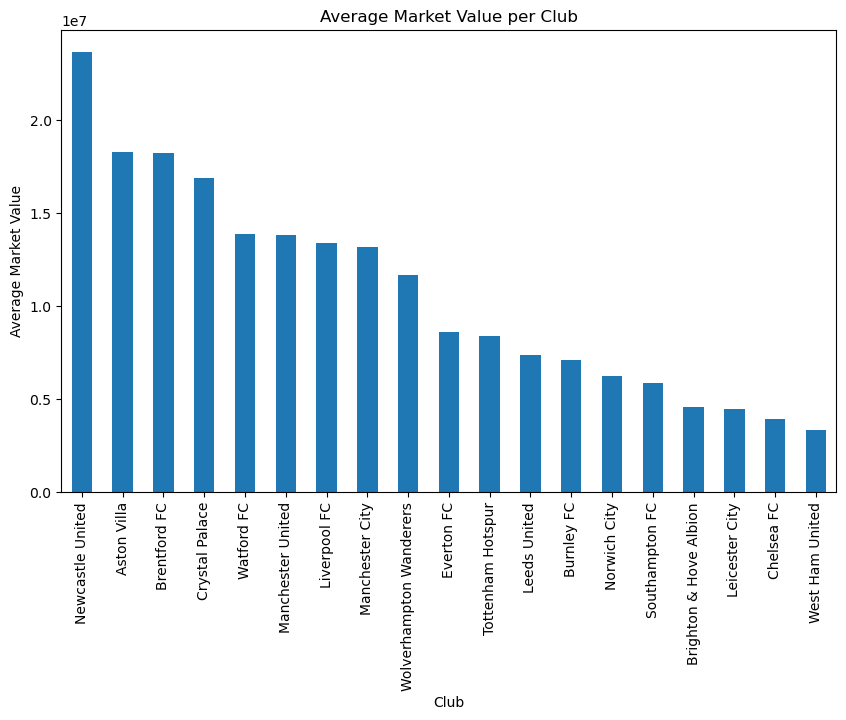

In [19]:
avg_market_value_per_club = officialdata.groupby('club')['market_value'].mean().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
avg_market_value_per_club.plot(kind='bar')
plt.title('Average Market Value per Club')
plt.xlabel('Club')
plt.ylabel('Average Market Value')
plt.show()

## Actual Trends Observed:

Newcastle United stands out with the highest average market value per player, which may reflect recent investments or a few high-value players raising the average.

Traditional top-tier clubs such as Manchester United, Liverpool, and Manchester City are not at the very top in this visual, indicating that the average market value might be influenced by a range of factors, including squad size and transfer strategy.

There is a gradual decrease in average market value as we move from clubs typically associated with the upper echelons of the league to those usually found lower in the standings.

Chelsea FC and Leicester City, known for their competitive performances, are observed towards the lower end of the spectrum, which could suggest a focus on developing talent or efficient market dealings that don't necessarily reflect in higher average values.

West Ham United has the lowest average market value per player among the clubs listed, which might suggest a different strategic approach or a reflection of their transfer activities during the season.

## Conclusion:

The bar chart indicates a diverse range of average market values across Premier League clubs, not strictly correlating with club prestige or success. This disparity may reflect the complexities of the transfer market, where various factors such as investment strategies, player development policies, and negotiation successes play significant roles. The data suggests that while financial resources are critical, they are not the sole determinant of a player's market value at a club. This overview can provide club management and analysts with insights into their relative market positioning and inform future transfer strategies.

# Player Movement In/Out by Nationality

## Purpose:

This bar chart is crafted to provide a comparison of player movements between the top country and a combined group of the next ten countries. Its aim is to highlight the relative scale of player transfers associated with the top country in contrast to other active countries in the transfer market.

## Expected Trends:

We would expect England, given its status as the home of the Premier League, to have a substantial amount of player movement.

The combined total of the next ten countries is anticipated to be significant as well, but possibly less than England's, indicating the Premier League's broad appeal yet concentrated local engagement.


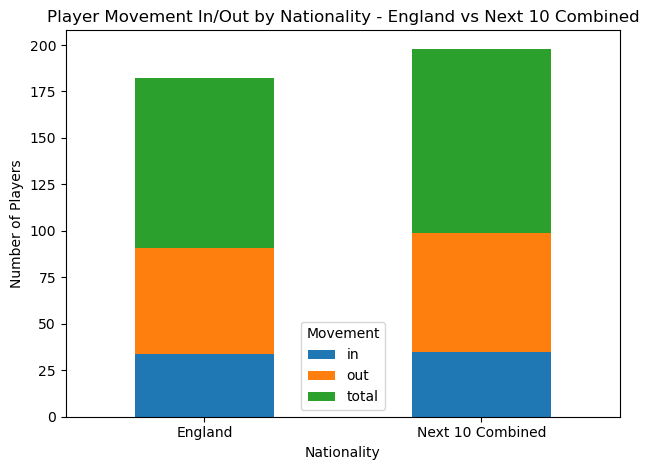

In [22]:
### Old code
# player_movement_nationality = officialdata.groupby('nationality')['movement'].value_counts().unstack().fillna(0)
#plt.figure(figsize=(12, 50))
#player_movement_nationality.plot(kind='bar', stacked=True)
#plt.title('Player Movement In/Out by Nationality')
#plt.xlabel('Nationality')
#plt.ylabel('Number of Players')
#plt.show()

# Group by nationality and movement, count the occurrences
player_movement_nationality = officialdata.groupby('nationality')['movement'].value_counts().unstack().fillna(0)

# Calculate the total movements by nationality
player_movement_nationality['total'] = player_movement_nationality.sum(axis=1)

# Sort by the total movements to find the top country
player_movement_nationality_sorted = player_movement_nationality.sort_values(by='total', ascending=False)

# Select the top country
top_country = player_movement_nationality_sorted.head(1)

# Select the next 10 countries
next_ten_countries = player_movement_nationality_sorted.iloc[1:11]

# Combine the movements of the next ten countries
next_ten_combined = next_ten_countries.sum().to_frame().T
next_ten_combined.index = ['Next 10 Combined']

# Concatenate the top country with the combined next ten for plotting
plot_data = pd.concat([top_country, next_ten_combined])

# Plotting
plot_data.plot(kind='bar', stacked=True)
plt.title('Player Movement In/Out by Nationality - England vs Next 10 Combined')
plt.xlabel('Nationality')
plt.ylabel('Number of Players')
plt.legend(title='Movement')
plt.xticks(rotation=0)  
plt.tight_layout()  
plt.show()


 



## Actual Trends Observed:

England shows a high number of both inbound and outbound player movements, underscoring its pivotal role in the Premier League's transfer dynamics.

The combined movement of the next ten countries is also considerable, reflecting the league's global reach and influence.

Notably, the outflow from England is particularly prominent, which may suggest a trend of English players moving abroad or a robust internal transfer market.

## Conclusion:

The bar chart clearly demonstrates England's dominance in player movements within the Premier League. The comparison with the next ten countries combined highlights the Premier League's position as a hub of international player traffic. The actual data presents a league that is both a destination and a source of professional opportunities for footballers, with England playing a particularly active role in this exchange. This overview not only underscores the Premier League's status within the global football landscape but also invites further analysis into the effects of these movements on national team performances and domestic league developments. 